# Neural Networks
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the **forward** and **backward** operations for different layers in neural networks
- implement a simple neural networks for classification

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked.

In [1]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [10]:
digit_data = sio.loadmat('digit_data.mat')
X = digit_data['X']
y = digit_data['y']
_, num_cases = X.shape
train_num_cases = num_cases * 4 // 5
X = X.reshape((400, num_cases))
X = X.transpose()
# X has the shape of (number of samples, number of pixels)
train_data = X[:train_num_cases,:]
train_label = y[:, :train_num_cases]
test_data = X[train_num_cases:, :]
test_label = y[:, train_num_cases:]
weights = {}
weights['fully1_weight'] = np.random.randn(400, 25) / 400
weights['fully1_bias'] = np.random.rand(25, 1) 
weights['fully2_weight'] = np.random.randn(25, 10) / 25
weights['fully2_bias'] = np.random.rand(10, 1)


## Training

In [11]:
# training setting
weight_inc = {}
for name in ('fully1_weight', 'fully1_bias', 'fully2_weight', 'fully2_bias'):
    weight_inc[name] = np.zeros(weights[name].shape)
batch_size = 100
max_epoch = 10
momW = 0.9
wc = 0.0005
learning_rate = 0.1

# Training iterations
from get_new_weight_inc import get_new_weight_inc
from feedforward_backprop import feedforward_backprop

XX = []
YY = []

for epoch in range(max_epoch):
    cnt = 0
    ave = 0
    for i in range(math.ceil(train_num_cases/batch_size)):
        data = train_data[i * batch_size:min((i + 1) * batch_size, train_num_cases), :]
        label = train_label[:, i * batch_size:min((i + 1) * batch_size, train_num_cases)]
        # The feedforward and backpropgation processes
        loss, accuracy, gradients = feedforward_backprop(data, label, weights)
        print('{:3}.{:2} loss:{:.3}, accuracy:{}'.format(epoch + 1, i + 1, loss, accuracy))
        ave += accuracy
        cnt += 1
        # Updating weights
        for name in ('fully1_weight', 'fully1_bias', 'fully2_weight', 'fully2_bias'):
            weight_inc[name] = get_new_weight_inc(weight_inc[name], weights[name], momW, wc, learning_rate, gradients[name + '_grad'])
            weights[name] += weight_inc[name]
    XX.append(epoch+1)
    YY.append(ave / cnt)
        

  1. 1 loss:2.35, accuracy:0.09
  1. 2 loss:2.32, accuracy:0.07
  1. 3 loss:2.3, accuracy:0.13
  1. 4 loss:2.33, accuracy:0.1
  1. 5 loss:2.29, accuracy:0.11
  1. 6 loss:2.28, accuracy:0.1
  1. 7 loss:2.28, accuracy:0.08
  1. 8 loss:2.28, accuracy:0.13
  1. 9 loss:2.29, accuracy:0.09
  1.10 loss:2.26, accuracy:0.16
  1.11 loss:2.22, accuracy:0.22
  1.12 loss:2.19, accuracy:0.25
  1.13 loss:2.17, accuracy:0.27
  1.14 loss:2.17, accuracy:0.28
  1.15 loss:2.07, accuracy:0.38
  1.16 loss:2.04, accuracy:0.44
  1.17 loss:2.0, accuracy:0.44
  1.18 loss:1.9, accuracy:0.52
  1.19 loss:1.88, accuracy:0.47
  1.20 loss:1.7, accuracy:0.59
  1.21 loss:1.6, accuracy:0.62
  1.22 loss:1.48, accuracy:0.64
  1.23 loss:1.38, accuracy:0.7
  1.24 loss:1.19, accuracy:0.77
  1.25 loss:1.15, accuracy:0.75
  1.26 loss:1.0, accuracy:0.8
  1.27 loss:1.08, accuracy:0.73
  1.28 loss:0.899, accuracy:0.8
  1.29 loss:0.827, accuracy:0.82
  1.30 loss:0.867, accuracy:0.75
  1.31 loss:0.8, accuracy:0.74
  1.32 loss:0.778

  8.10 loss:0.138, accuracy:0.96
  8.11 loss:0.146, accuracy:0.95
  8.12 loss:0.217, accuracy:0.96
  8.13 loss:0.182, accuracy:0.92
  8.14 loss:0.287, accuracy:0.94
  8.15 loss:0.0876, accuracy:0.97
  8.16 loss:0.149, accuracy:0.96
  8.17 loss:0.141, accuracy:0.95
  8.18 loss:0.24, accuracy:0.93
  8.19 loss:0.217, accuracy:0.94
  8.20 loss:0.151, accuracy:0.96
  8.21 loss:0.125, accuracy:0.97
  8.22 loss:0.162, accuracy:0.92
  8.23 loss:0.188, accuracy:0.96
  8.24 loss:0.15, accuracy:0.95
  8.25 loss:0.0995, accuracy:0.96
  8.26 loss:0.104, accuracy:0.98
  8.27 loss:0.195, accuracy:0.95
  8.28 loss:0.125, accuracy:0.99
  8.29 loss:0.169, accuracy:0.97
  8.30 loss:0.12, accuracy:0.96
  8.31 loss:0.165, accuracy:0.95
  8.32 loss:0.103, accuracy:0.97
  8.33 loss:0.207, accuracy:0.94
  8.34 loss:0.175, accuracy:0.97
  8.35 loss:0.272, accuracy:0.94
  8.36 loss:0.179, accuracy:0.96
  8.37 loss:0.16, accuracy:0.94
  8.38 loss:0.126, accuracy:0.97
  8.39 loss:0.155, accuracy:0.95
  8.40 loss:

## Testing

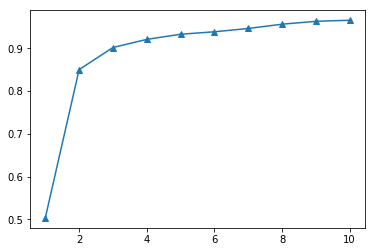

loss:0.241, accuracy:0.927


In [12]:
# TODO
import matplotlib.pyplot as plt

plt.figure()
plt.plot(XX, YY, "-^")
plt.show()
loss, accuracy, _ = feedforward_backprop(test_data, test_label, weights)
print('loss:{:.3}, accuracy:{}'.format(loss, accuracy))